In [1]:
import cv2

In [2]:
img=cv2.imread("test.jpg")

In [4]:
img.shape

(339, 512, 3)

In [5]:
import matplotlib.pyplot as plt

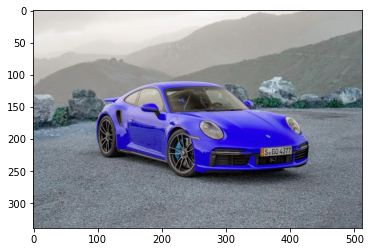

In [6]:
plt.imshow(img)

In [7]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

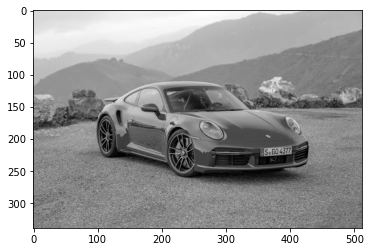

In [8]:
plt.imshow(gray,cmap="gray")

In [9]:
gray.shape

(339, 512)

In [10]:
mean=0
std_div=50
row=gray.shape[0]
col=gray.shape[1]

In [11]:
import numpy as np

In [12]:
guass=np.random.normal(mean,std_div,(row,col))

In [13]:
guass.shape

(339, 512)

In [14]:
guass[0].shape

(512,)

In [15]:
gray_noisy=gray+guass

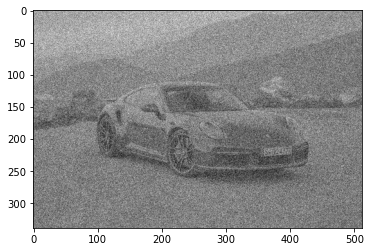

In [16]:
plt.imshow(gray_noisy,cmap="gray")

In [17]:
#Mean Filter
#Defualt System Defined Code
filter_h=np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
])/float(9)

In [18]:
filter_h

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [19]:
import scipy.signal

In [20]:
gray_after_filter=scipy.signal.convolve2d(gray_noisy,filter_h,mode="same")

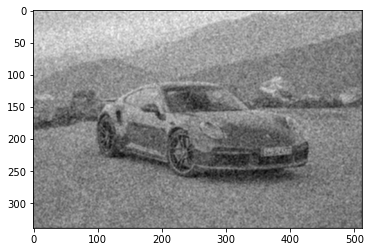

In [21]:
plt.imshow(gray_after_filter,cmap="gray")

In [26]:
gray_after_filter_using_median=scipy.signal.medfilt2d(gray_noisy,3)

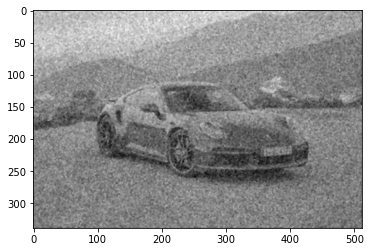

In [27]:
plt.imshow(gray_after_filter_using_median,cmap="gray")

In [28]:
gray.shape

(339, 512)

In [29]:
gray_noisy.shape

(339, 512)

In [30]:
gray.data

In [31]:
gray_noisy.data

In [32]:
####Implement of a 3X3 median filter without using the opencv module

In [33]:
gray_noisy_removed=gray*1

In [34]:
#Supplimentary code to understand the median filter: finding the neighbors
row=gray_noisy.shape[0] #3
col=gray_noisy.shape[1] #3
for i in range(row):
    #print("i:{}".format(i))
    for j in range(col):
        #print("\tj:{}".format(j))
        local_arr=[]
        for k in range(np.max([0,i-1]),np.min([i+2,row])):
            for l in range(np.max([0,j-1]),np.min([j+2,col])):
                #print("\t\tk:{} l:{}".format(k,l),end="")
                local_arr.append(gray_noisy[k,l])
                #print("\t\t{}".format(local_arr))
        #print("\t\t\tMedian: {}".format(np.median(local_arr)))
        gray_noisy_removed[i,j]=np.median(local_arr)
        #print("-----------------------")
#print(gray_noisy_removed)

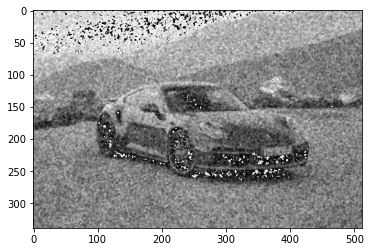

In [35]:
plt.imshow(gray_noisy_removed,cmap="gray")

In [36]:
np.random.seed(100)
np.random.randint(1,20)

9

In [37]:
#Apply salt-pepper noise on the GRAY image
gray_with_sp_noise=gray

In [38]:
gray_with_sp_noise.shape

(339, 512)

In [39]:
sp_tool=np.random.randint(0,21,(row,col))

In [40]:
sp_tool.shape

(339, 512)

In [41]:
sp_tool

array([[ 3,  7, 15, ..., 13, 14, 15],
       [17, 13, 14, ...,  6, 12,  0],
       [ 6,  0,  2, ...,  6, 10,  9],
       ...,
       [ 3, 10,  9, ..., 17,  3, 17],
       [ 4, 10, 14, ...,  3, 10,  2],
       [19, 10,  3, ...,  3, 10,  5]])

In [42]:
for i in range(row):
    for j in range(col):
        if sp_tool[i][j]==0:
            gray_with_sp_noise[i][j]=0
        if sp_tool[i][j]==20:
            gray_with_sp_noise[i][j]=255

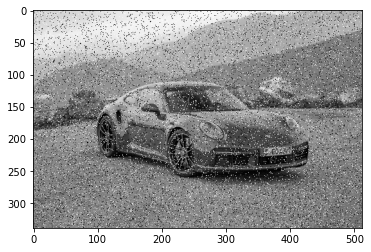

In [43]:
plt.imshow(gray_with_sp_noise,cmap="gray")

In [44]:
gray_sp_removed_mean_filter=scipy.signal.convolve2d(gray_with_sp_noise,filter_h,mode="same")

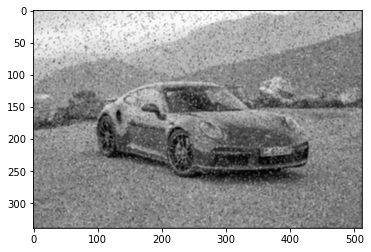

In [45]:
plt.imshow(gray_sp_removed_mean_filter,cmap="gray")

In [46]:
gray_sp_removed_median=gray*1

In [47]:
#Supplimentary code to understand the median filter: finding the neighbors
row=gray_with_sp_noise.shape[0] #3
col=gray_with_sp_noise.shape[1] #3
for i in range(row):
    #print("i:{}".format(i))
    for j in range(col):
        #print("\tj:{}".format(j))
        local_arr=[]
        for k in range(np.max([0,i-1]),np.min([i+2,row])):
            for l in range(np.max([0,j-1]),np.min([j+2,col])):
                #print("\t\tk:{} l:{}".format(k,l),end="")
                local_arr.append(gray_with_sp_noise[k,l])
                #print("\t\t{}".format(local_arr))
        #print("\t\t\tMedian: {}".format(np.median(local_arr)))
        gray_sp_removed_median[i,j]=np.median(local_arr)
        #print("-----------------------")
#print(gray_noisy_removed)

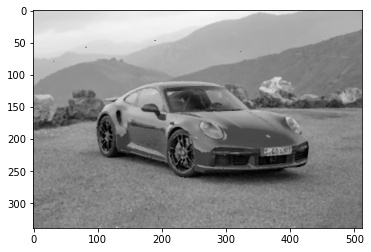

In [48]:
plt.imshow(gray_sp_removed_median,cmap="gray")

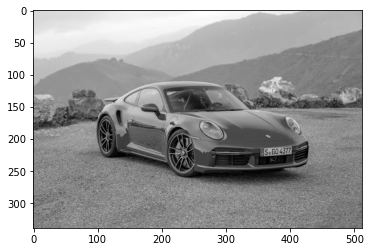

In [49]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray")